# Can we predict where a given bottle of wine was produced based on the provided data?

## Introduction: Overview of the problem.

We have been given a set of data that contains the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. In the dataset, there are 13 different attributes of each wine and one output attribute which shows which of the cultivars the wine was produced. We have been tasked with using the given attributes and building a model to see if we can identify where a bottle of wine was produced.

What actually is a cultivar? A cultivar is a "cultivated variety" [1] - in this case a name given to a variety of grapes which can produce different flavours of wine with different features. For example some grape varieties are Sauvignon Blanc, Chardonnay and Pinot Noir which have different acidity, alcohol levels and flavour (some of the attributes from our dataset).

There is benefits for both consumer and industry by knowing where a bottle of wine was produced. It is useful for the industry as they can use this for quality control and marketing strategies as knowing the origin of wine has also been shown to affect consumers’ perception of wines. For example, a study by Ashton found that when a wine is believed to be from New Jersey, it receives “lower enjoyment ratings’’ than when the identical wine is believed to be from California [2]. For consumers, knowing the origin of a wine can provide important information about the characteristics of the wine, such as flavour, profile, and age potential, and help inform purchasing decisions.

## Introduction: Overview of the proposed solution.

To try and tackle the problem of predicting the origin of a bottle of wine with the data provided, we will have to use different machine learning algorithms and techniques, such as preprocessing (cleaning the data), feature engineering (analysing and using the most valuable features) and model selection (deciding which of the models that we create is the best).

The first stage is exploratory analysis. We will try and understand if there are any patterns or relationships within the dataset. We will need visualisations such as graphs, and correlation diagrams to spot any anomalies or issues that need to be sorted before we can continute with implementing our model.

Once the data has been tidied, we will use different feature engineering techniques such as dimensionality reduction and feature selection to to try and discover which are the most important to us for predicting wine origin. We can use the more important ones and ignore the ones that are less useful for a different model to try and create one which is as accurate as we can create. 

Next, we will train the machine to be able to predict and calculate which cultivar the wine originates from by using a variety of machine learning algorithms such as decision tree classifier and random forest classifiers to identify the most effective model for predicting wine origin. To finalise, we should use cross-validation techniques such as "K-fold cross validation" so we know that our models are not overfitting to the training data and that they generalize well to new data.




## Data Description: Overview of chosen dataset.

The database that has been provided is a collection of chemical analyses of wines produced in the same region of Italy, but from three different cultivars. In total, there are 178 samples in the dataset, each with 13 attributes and one output attribute (the target being either 1, 2 or 3). The 13 attributes of the data set include alcohol, malic acid, ash, ash acidity, magnesium, total phenols, flavanoids, non-flavanoid phenols, proanthocyanins, color intensity, colour, OD280/OD315 of diluted wines and proline. These attributes provide a comprehensive set of chemical measurements that can build models to predict the origin of wine. However, some of these attributes may be correlated, which could affect the accuracy of our predictions. Therefore, we will conduct exploratory data analysis to identify any problems and determine what features to use in our models. Overall, thisdata setprovides a rich set of data that enables us to build predictive modelsto determinethe origin of wine based on chemical composition.






In [124]:
# Lets begin by importing the libraries we need

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel



from pandas.plotting import scatter_matrix
from sklearn.tree import export_text
from sklearn.datasets import load_iris
from sklearn import tree


## Exploratory Analysis

In [125]:
# To begin with our exploratory analysis, we need to read the data.
df = pd.read_csv('Downloads/wine.csv')

In [126]:
#  And label the columns so the data makes sense to read. 
df.columns = ['Target', 'Alcohol', 'Malic Acid', 'Ash', 'Alcalinity of Ash', 'Magnesium', 'Total phenols',
              'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
             'Proline']

In [127]:
# Lets have a look at the first five rows.
df.head()

,Target,Alcohol,Malic Acid,Ash,Alcalinity of Ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


Now that we have read and labelled our data so that it can be read, lets start to try gain insight into the underlying patterns and relationships within the dataset.

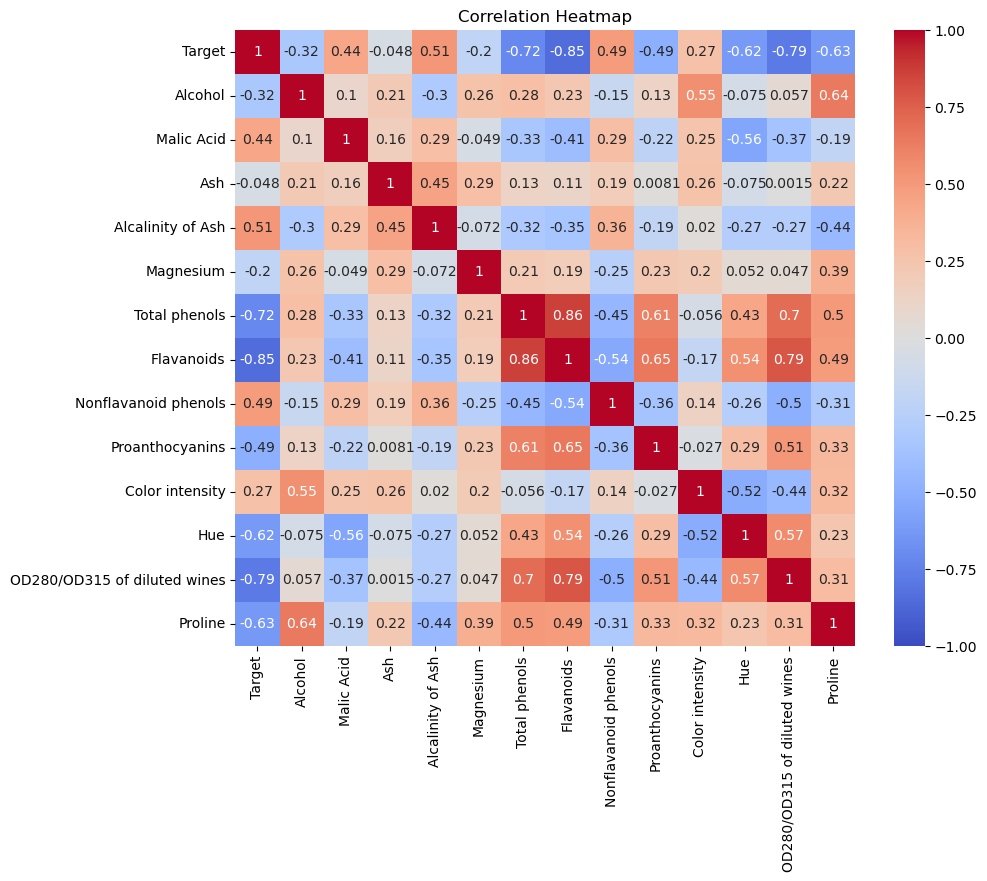

In [128]:
# Let's now have a look at a correlation heatmap with the features.
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap')
plt.show()

Looking at the correlation heatmap, we can tell that:

* Flavanoids and total phenols and have very similar relationsips with other attributes, and correlate very positively together
* Flavanoids, total phenols and OD280/OD315 of diluted wines have a very strong negative correlation with the target


<Axes: xlabel='Target', ylabel='Flavanoids'>

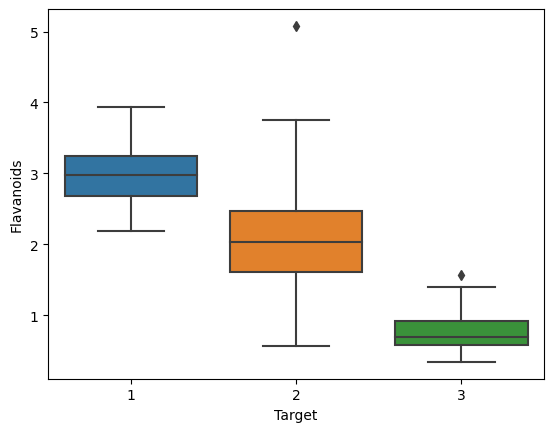

In [129]:
sns.boxplot(x='Target', y='Flavanoids', data=df)


This is the negative correlation visualised.

# Building the model(s)

# Model One: Decision Tree Classifier


In [130]:
# We need to split the data 80/20. 80% of the data is used to train the model, and the remaining 20% is used to test it.
# This split will be used for all of our models.

X = df.drop(columns=['Target'])
y= df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

We will now use train and test data with the decision tree classifier. It works by recursively partitioning the data and constructing a tree like model in which every node represents a test on a feature and each branch represents an outcome of a test. Once the tree is built, it can be used to estimate the target label of new instances it hasn't seen by traversing the tree from the root node to a leaf node, following the branches that correspond to the values of the input features. We can then calculate how accurate to see how well it performed.

In [131]:
# Creating the tree.
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [132]:
# Lets visualize the decision tree
print(tree.export_text(dtc, feature_names = list(X_train.columns)))

|--- Color intensity <= 3.46
|   |--- class: 2
|--- Color intensity >  3.46
|   |--- Flavanoids <= 1.68
|   |   |--- Alcohol <= 11.93
|   |   |   |--- class: 2
|   |   |--- Alcohol >  11.93
|   |   |   |--- class: 3
|   |--- Flavanoids >  1.68
|   |   |--- Proline <= 724.50
|   |   |   |--- class: 2
|   |   |--- Proline >  724.50
|   |   |   |--- class: 1



In [133]:
# Calculate the predictions
y_pred = dtc.predict(X_test)

In [134]:
# Test the performance of the model on the testing data by comparing predictions against real data
accuracy_dtc = accuracy_score(y_test, y_pred)
precision_dtc = precision_score(y_test, y_pred, average = 'weighted')
recall_dtc = recall_score(y_test, y_pred, average = 'weighted')
f1_score_dtc = f1_score(y_test, y_pred, average = 'weighted')

In [135]:
# Lets see how accurate it is.
print("Model Performance:")
print("Accuracy: {:.2f}%".format(accuracy_dtc * 100))
print("Precision: {:.2f}%".format(precision_dtc * 100))
print("Recall: {:.2f}%".format(recall_dtc * 100))
print("F1-Score: {:.2f}%".format(f1_score_dtc * 100))

Model Performance:
Accuracy: 88.89%
Precision: 90.70%
Recall: 88.89%
F1-Score: 89.07%


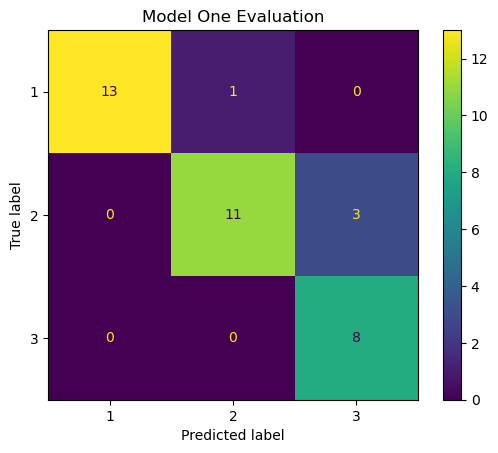

In [136]:
# Create and display confusion matrix for better visualisation
cm = confusion_matrix(y_test, y_pred , labels=dtc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['1', '2', '3'])
disp.plot()
plt.title('Model One Evaluation')
plt.show()

From this confusion matrix, we can tell that it has perfect precision for the 1, only 1 incorrect reading for 2, and 3 incorrect reading for 3. Lets also display a report so that we can fully understand how well this model performed and then summarise after.

In [137]:
# Here is the report of the classifier.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.93      0.96        14
           2       0.92      0.79      0.85        14
           3       0.73      1.00      0.84         8

    accuracy                           0.89        36
   macro avg       0.88      0.90      0.88        36
weighted avg       0.91      0.89      0.89        36



Overall, this model is good at best. It has perfect precision for the class 1 which means that if the model believes that you a wine was made in the first cultivar it was 100% accurate. However, it has 93% recall which means that it had incorrectly guessed 1 sample in this case which we can see from the confusion matrix. For the second and third cultivar it had less precision and less recall giving them lower f1 scores, which means that this model could definitely be improved. We will try and use a better one for our second model, the random forest classifier.

# Model Two: Random Forest Classifier

For our second model, we will be using a random forest classifier. This is similar to a decision tree classifier, but also has its differences. For example, a DTC is only one tree whereas a RFC is multiple decision trees. In a decision tree classifier, the entire dataset is used to create a single tree, however in a random forest classifier, each tree is trained on a random subset of the dataset. They are known to be more accurate and precise than decision tree classifiers so we shall see how it performs.


In [138]:
# Train a random forest classifier on the data
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [139]:
# Calculate predictions
y_pred = rfc.predict(X_test)

In [140]:
#Evaluate the performance of the model on the testing data by testing predictions against real data
accuracy_rfc = accuracy_score(y_test, y_pred)
precision_rfc = precision_score(y_test, y_pred, average = 'weighted')
recall_rfc = recall_score(y_test, y_pred, average = 'weighted')
f1_score_rfc = f1_score(y_test, y_pred, average = 'weighted')


In [141]:
# Display Calculations
print("Model Performance:")
print("Accuracy: {:.2f}%".format(accuracy_rfc * 100))
print("Precision: {:.2f}%".format(precision_rfc * 100))
print("Recall: {:.2f}%".format(recall_rfc * 100))
print("F1-Score: {:.2f}%".format(f1_score_rfc * 100))


Model Performance:
Accuracy: 94.44%
Precision: 95.56%
Recall: 94.44%
F1-Score: 94.54%


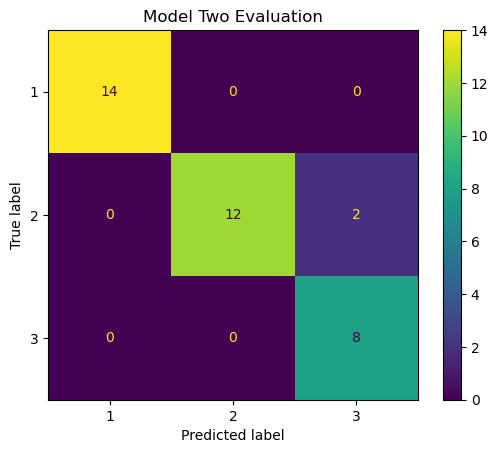

In [142]:
# This already looks a lot better. Lets display a confusion matrix again for better visualisation
cm = confusion_matrix(y_test, y_pred , labels=dtc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['1', '2', '3'])
disp.plot()
plt.title('Model Two Evaluation')
plt.show()


In [143]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      0.86      0.92        14
           3       0.80      1.00      0.89         8

    accuracy                           0.94        36
   macro avg       0.93      0.95      0.94        36
weighted avg       0.96      0.94      0.95        36



As expected, this model is already looking better, with a higher average on all the stats. The first class has a perfect precision and recall, meaning that it identified everything correctly with no misses either. The second class had perfect precision again but was lacking in the recall as it two samples, giving it an overall f1 score of 0.92 which isn't bad, but not perfect. The third class correctly identified everything that shouldve been in the class, but had precision of 80%, giving it the worst f1 score of 0.89. 

# Discussion of Results


Just from reading the stats alone, we can tell that the random forest classifier outperformed the decision tree classifier in every way. Let's compare the stats side by side so we can get down to the details.

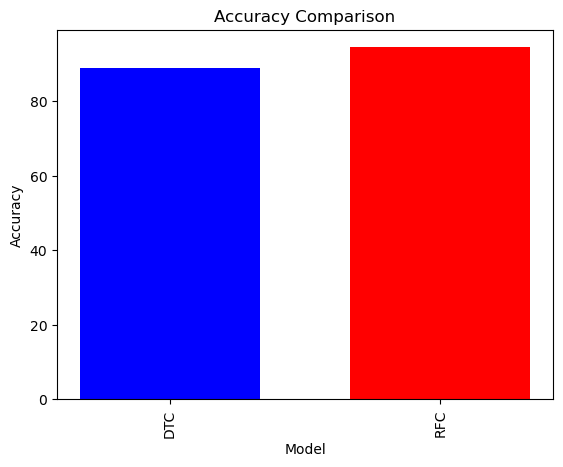

In [144]:
# Lets compare the accuracy of the models side by side.
left = [0, 0.15] #x-coordinates of left sides of bars 
height = [accuracy_dtc*100 , accuracy_rfc*100]
tick_label = ['DTC', 'RFC'] #bar labels
plt.bar(left, height, tick_label = tick_label,
        width = 0.1, color = ['blue', 'red',])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.xticks(rotation=90)
plt.show()

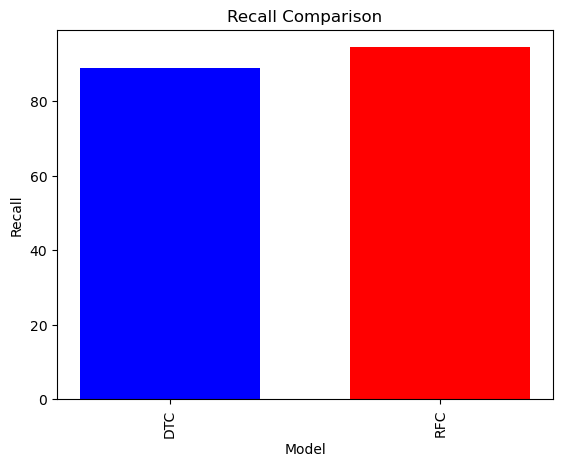

In [145]:
# Now lets compare the recall of the models side by side.
left = [0, 0.15] #x-coordinates of left sides of bars 
height = [recall_dtc*100 , recall_rfc*100]
tick_label = ['DTC', 'RFC'] #bar labels
plt.bar(left, height, tick_label = tick_label,
        width = 0.1, color = ['blue', 'red',])
plt.xlabel('Model')
plt.ylabel('Recall')
plt.title('Recall Comparison')
plt.xticks(rotation=90)
plt.show()

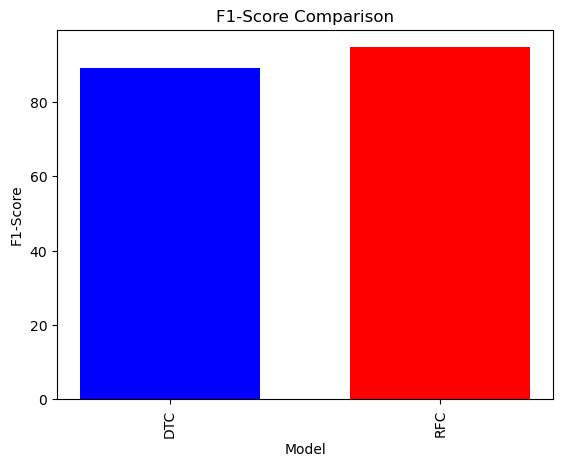

In [146]:
# Now lets compare the f1 score of the models side by side.
left = [0, 0.15] #x-coordinates of left sides of bars 
height = [f1_score_dtc*100 , f1_score_rfc*100]
tick_label = ['DTC', 'RFC'] #bar labels
plt.bar(left, height, tick_label = tick_label,
        width = 0.1, color = ['blue', 'red',])
plt.xlabel('Model')
plt.ylabel('F1-Score')
plt.title('F1-Score Comparison')
plt.xticks(rotation=90)
plt.show()

With the models provided, along with the stats that we have analysed we can easily say that the random forest classifier has the edge over the decision tree classsifier in every aspect. Both of the data sets were limited by the fact that we had (in the context of machine learning) little data to work with so they couldn't learn as well as they could've - provided there was more data. However with the random forest classifier averaging at 95%, we can say that it is a good model.

# Conclusion

To conclude, I think we successfully created a model that can predict which cultivar a bottle of wine was produced based on the given data. With the limimed resources, we built a model with 94% accuracy. Although this is good, it could be better if I had cleaned the data beforehand or even changed the parameters for the better model and only using the more relevant features that I had identified during the exploratory analysis. 

# References

1. This, P., Lacombe, T., & Thomas, M. G. (2006). Historical origins and genetic diversity of wine grapes. Trends in Genetics, 22(9), 511–519. https://doi.org/10.1016/j.tig.2006.07.008

2. Valentin, D., Valente, C., Quéré, J. L., Symoneaux, R., Smith, I., Bauer, F., & Nieuwoudt, H. (2021). The Impact of “Wine Country of Origin” on the Perception of Wines by South African and French Wine Consumers: A Cross-Cultural Comparison. Foods, 10(8), 1710. https://doi.org/10.3390/foods10081710